In [80]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from tqdm import tqdm

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan']

sn.set_theme()

In [2]:
%%time
datasetTweetsCleanedPath = "../dataset/tweets_no_outliers.h5"
df_tweets = pd.read_hdf(datasetTweetsCleanedPath)

CPU times: total: 7.77 s
Wall time: 8.97 s


In [3]:
%%time
datasetUsersPath = "../dataset/users_clean_with_indicators_no_outliers.h5"
df_users = pd.read_hdf(datasetUsersPath)

CPU times: total: 46.9 ms
Wall time: 46.6 ms


## Merge users and tweets

In [4]:
df_bot_col = df_users.bot.to_frame("bot")
df_bot_col

,bot
2353593986,1
2358850842,0
137959629,1
466124818,1
2571493866,0
...,...
2911861962,0
1378532629,0
126984069,0
2383025796,1


In [5]:
df_tweets.groupby(["user_id"]).count()

,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
user_id,,,,,,,,
-1.000000e+00,213713,213713,213713,213713,213713,213713,213713,213713
0.000000e+00,6,6,6,6,6,6,6,6
2.000000e+00,2,2,2,2,2,2,2,2
3.000000e+00,3,3,3,3,3,3,3,3
5.000000e+00,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...
4.800000e+64,1,1,1,1,1,1,1,1
3.300000e+66,1,1,1,1,1,1,1,1
4.000000e+95,1,1,1,1,1,1,1,1


In [6]:
df_merge = pd.merge(df_tweets, df_bot_col, how="outer", left_on="user_id", right_index=True)
df_merge

c:\Users\Domenico\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\reshape\merge.py:1203: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  warnings.warn(


,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text,bot
0,327746321.0,0,0,0,0,0,0,2019-09-11 14:53:55,"if man is a little lower than angels, then ang...",1.0
9050,327746321.0,0,0,0,0,1,0,2019-10-21 17:42:10,read the biography of don henley http://t.co/...,1.0
12889,327746321.0,0,0,0,0,0,0,2019-11-02 15:11:22,don't tell me where your priorities are. show ...,1.0
17348,327746321.0,0,0,0,0,1,0,2019-11-07 22:07:20,learn about the great music of bill justis ht...,1.0
19810,327746321.0,0,0,0,0,1,0,2019-10-12 04:46:17,do you love james bond? â check out these cool...,1.0
...,...,...,...,...,...,...,...,...,...,...
11586308,932.0,0,0,0,0,0,0,2019-09-13 01:09:50,,NaN
11597852,334249560.0,0,0,0,0,0,1,2017-12-09 19:29:36,@maricar85 yo toy currando :-( si te sirve d ...,1.0
11642251,8994.0,198,0,0,0,1,2,2020-04-23 04:34:03,"rt @annecurtissmith: and of course, thank you ...",NaN
11650446,541.0,0,0,0,0,0,0,2019-06-12 19:13:54,whole life just went pause for a moment.,NaN


In [7]:
print("NaN users:", len(df_merge[df_merge.bot.isna()].user_id.unique()))
valid_users = df_merge[df_merge.bot.notna()]
print("Valid users:", len(valid_users.user_id.unique()))

NaN users: 634
Valid users: 11508


## Keep only the tweets posted in 2019

In [8]:
df_tweets_2019 = valid_users[(valid_users.created_at > np.datetime64('2019-01-01 00:00:00')) & (valid_users.created_at < np.datetime64('2019-12-31 23:59:59'))].copy()

In [9]:
print("Min created_at:", df_tweets_2019.created_at.min())
print("Max created_at:", df_tweets_2019.created_at.max())

Min created_at: 2019-01-01 00:21:18
Max created_at: 2019-11-15 22:11:22


In [10]:
print("Number of unique users that posted in 2019:", len(df_tweets_2019.user_id.unique()))

Number of unique users that posted in 2019: 6787


In [11]:
df_tweets_2019.describe()

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,bot
count,4.562614e+06,4.562614e+06,4.562614e+06,4.562614e+06,4.562614e+06,4.562614e+06,4.562614e+06,4.562614e+06
mean,7.308305e+08,2.046320e+02,2.154298e-01,1.096931e+00,1.242110e-01,2.000099e-01,2.296942e-01,7.160943e-01
std,7.051947e+08,1.641358e+04,1.195273e+02,4.670575e+02,5.495074e-01,4.063234e-01,5.609365e-01,4.508917e-01
min,7.226230e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.299046e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.671855e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,6.151363e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,2.722021e+09,3.350111e+06,2.000000e+05,9.224620e+05,2.800000e+01,4.000000e+01,4.000000e+01,1.000000e+00


In [12]:
df_tweets_2019.shape

(4562614, 10)

In [13]:
df_tweets_2019.isna().any()

user_id           False
retweet_count     False
reply_count       False
favorite_count    False
num_hashtags      False
num_urls          False
num_mentions      False
created_at        False
text              False
bot               False
dtype: bool

#### Only keep year, month and day in the created_at feature

In [14]:
df_tweets_2019['created_at'] = df_tweets_2019['created_at'].dt.date
df_tweets_2019.created_at = df_tweets_2019.created_at.astype('datetime64')
df_tweets_2019

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text,bot
0,3.277463e+08,0,0,0,0,0,0,2019-09-11,"if man is a little lower than angels, then ang...",1.0
9050,3.277463e+08,0,0,0,0,1,0,2019-10-21,read the biography of don henley http://t.co/...,1.0
12889,3.277463e+08,0,0,0,0,0,0,2019-11-02,don't tell me where your priorities are. show ...,1.0
17348,3.277463e+08,0,0,0,0,1,0,2019-11-07,learn about the great music of bill justis ht...,1.0
19810,3.277463e+08,0,0,0,0,1,0,2019-10-12,do you love james bond? â check out these cool...,1.0
...,...,...,...,...,...,...,...,...,...,...
9403947,2.236789e+09,13,0,0,0,1,2,2019-03-13,rt @dallasnews: mt @sportsdaydfw: jerry jones:...,0.0
9541859,2.236789e+09,0,0,0,0,0,1,2019-03-14,@demarcusware im so sad your leaving! guess ro...,0.0
9834595,2.236789e+09,0,0,0,0,0,1,2019-03-15,@matrix31 a fancy metal one,0.0
7984056,1.200829e+08,0,0,0,0,0,1,2019-06-08,@donlbe take care,0.0


## Create timeseries

In [15]:
df_tweets_2019 = df_tweets_2019.groupby(['user_id', 'created_at']).sum()
df_tweets_2019

retweet_count  reply_count  favorite_count  \
user_id      created_at                                               
7.226230e+05 2019-01-03              7            0               4   
             2019-01-04           9919            0               2   
             2019-01-05              0            0               2   
             2019-01-06              1            0               0   
             2019-01-07            148            0               3   
...                                ...          ...             ...   
2.722021e+09 2019-07-28              0            0               5   
             2019-07-29              0            0               4   
             2019-07-30              0            0               6   
             2019-07-31           2948            0               4   
             2019-08-01              0            0               4   

                         num_hashtags  num_urls  num_mentions  bot  
user_id      created_at                                             
7.226230e+05 2019-01-03             1         0             6  0.0  
             2019-01-04             1         0             5  0.0  
             2019-01-05             0         0             1  0.0  
             2019-01-06             1         0             2  0.0  
             2019-01-07             5         0             8  0.0  
...                               ...       ...           ...  ...  
2.722021e+09 2019-07-28             0         0             1  0.0  
             2019-07-29             0         0             1  0.0  
             2019-07-30             0         0             4  0.0  
             2019-07-31             0         0             1  0.0  
             2019-08-01             0         0             6  0.0  

[517656 rows x 7 columns]

In [16]:
df_tweets_2019['success_score'] = (df_tweets_2019.retweet_count + df_tweets_2019.reply_count + df_tweets_2019.favorite_count) / (df_tweets_2019.num_hashtags + df_tweets_2019.num_urls + df_tweets_2019.num_mentions + 0.1)
df_tweets_2019

retweet_count  reply_count  favorite_count  \
user_id      created_at                                               
7.226230e+05 2019-01-03              7            0               4   
             2019-01-04           9919            0               2   
             2019-01-05              0            0               2   
             2019-01-06              1            0               0   
             2019-01-07            148            0               3   
...                                ...          ...             ...   
2.722021e+09 2019-07-28              0            0               5   
             2019-07-29              0            0               4   
             2019-07-30              0            0               6   
             2019-07-31           2948            0               4   
             2019-08-01              0            0               4   

                         num_hashtags  num_urls  num_mentions  bot  \
user_id      created_at                                              
7.226230e+05 2019-01-03             1         0             6  0.0   
             2019-01-04             1         0             5  0.0   
             2019-01-05             0         0             1  0.0   
             2019-01-06             1         0             2  0.0   
             2019-01-07             5         0             8  0.0   
...                               ...       ...           ...  ...   
2.722021e+09 2019-07-28             0         0             1  0.0   
             2019-07-29             0         0             1  0.0   
             2019-07-30             0         0             4  0.0   
             2019-07-31             0         0             1  0.0   
             2019-08-01             0         0             6  0.0   

                         success_score  
user_id      created_at                 
7.226230e+05 2019-01-03       1.549296  
             2019-01-04    1626.393443  
             2019-01-05       1.818182  
             2019-01-06       0.322581  
             2019-01-07      11.526718  
...                                ...  
2.722021e+09 2019-07-28       4.545455  
             2019-07-29       3.636364  
             2019-07-30       1.463415  
             2019-07-31    2683.636364  
             2019-08-01       0.655738  

[517656 rows x 8 columns]

In [17]:
# keep only success_score and bot
df_tweets_2019.drop(df_tweets_2019.columns.difference(['success_score']), 1, inplace=True)
df_tweets_2019

C:\Users\Domenico\AppData\Local\Temp\ipykernel_9180\206118567.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_tweets_2019.drop(df_tweets_2019.columns.difference(['success_score']), 1, inplace=True)


success_score
user_id      created_at               
7.226230e+05 2019-01-03       1.549296
             2019-01-04    1626.393443
             2019-01-05       1.818182
             2019-01-06       0.322581
             2019-01-07      11.526718
...                                ...
2.722021e+09 2019-07-28       4.545455
             2019-07-29       3.636364
             2019-07-30       1.463415
             2019-07-31    2683.636364
             2019-08-01       0.655738

[517656 rows x 1 columns]

In [18]:
# will put user id into column and created_at as index
df_tweets_2019 = df_tweets_2019.pivot_table('success_score','created_at','user_id')
df_tweets_2019

user_id,7.226230e+05,7.557460e+05,8.069750e+05,8.872810e+05,1.382561e+06,3.888491e+06,5.812422e+06,5.820222e+06,6.296742e+06,6.775342e+06,...,2.654027e+09,2.658727e+09,2.662897e+09,2.675561e+09,2.680793e+09,2.682782e+09,2.688868e+09,2.711227e+09,2.718000e+09,2.722021e+09
created_at,,,,,,,,,,,,,,,,,,,,,
2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,1.549296,0.0,NaN,0.0,60.094007,0.0,0.10989,68.395062,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,1626.393443,0.0,NaN,NaN,0.448065,NaN,4.83871,575.742574,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-05,1.818182,0.0,NaN,NaN,0.370370,NaN,0.00000,0.000000,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
all_year_dates = pd.DataFrame(index = pd.Series(pd.date_range('01-01-2019','31-12-2019')).rename("created_at"))
all_year_dates

""
created_at
2019-01-01
2019-01-02
2019-01-03
2019-01-04
2019-01-05
...
2019-12-27
2019-12-28
2019-12-29


In [20]:
df_tweets_2019 = all_year_dates.merge(df_tweets_2019, how='outer', on="created_at")
df_tweets_2019

,7.226230e+05,7.557460e+05,8.069750e+05,8.872810e+05,1.382561e+06,3.888491e+06,5.812422e+06,5.820222e+06,6.296742e+06,6.775342e+06,...,2.654027e+09,2.658727e+09,2.662897e+09,2.675561e+09,2.680793e+09,2.682782e+09,2.688868e+09,2.711227e+09,2.718000e+09,2.722021e+09
created_at,,,,,,,,,,,,,,,,,,,,,
2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,1.549296,0.0,NaN,0.0,60.094007,0.0,0.10989,68.395062,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,1626.393443,0.0,NaN,NaN,0.448065,NaN,4.83871,575.742574,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-05,1.818182,0.0,NaN,NaN,0.370370,NaN,0.00000,0.000000,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df_tweets_2019.fillna(-1, inplace=True)
df_tweets_2019

,7.226230e+05,7.557460e+05,8.069750e+05,8.872810e+05,1.382561e+06,3.888491e+06,5.812422e+06,5.820222e+06,6.296742e+06,6.775342e+06,...,2.654027e+09,2.658727e+09,2.662897e+09,2.675561e+09,2.680793e+09,2.682782e+09,2.688868e+09,2.711227e+09,2.718000e+09,2.722021e+09
created_at,,,,,,,,,,,,,,,,,,,,,
2019-01-01,-1.000000,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.00000,-1.000000,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2019-01-02,-1.000000,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.00000,-1.000000,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2019-01-03,1.549296,0.0,-1.0,0.0,60.094007,0.0,0.10989,68.395062,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2019-01-04,1626.393443,0.0,-1.0,-1.0,0.448065,-1.0,4.83871,575.742574,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2019-01-05,1.818182,0.0,-1.0,-1.0,0.370370,-1.0,0.00000,0.000000,-1.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,-1.000000,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.00000,-1.000000,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2019-12-28,-1.000000,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.00000,-1.000000,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2019-12-29,-1.000000,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.00000,-1.000000,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [22]:
df_tweets_2019 = df_tweets_2019.transpose()
df_tweets_2019.index.name = 'user_id'
df_tweets_2019

created_at,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,...,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
user_id,,,,,,,,,,,,,,,,,,,,,
7.226230e+05,-1.0,-1.0,1.549296,1626.393443,1.818182,0.322581,11.526718,19.354839,0.487805,0.392157,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
7.557460e+05,-1.0,-1.0,0.000000,0.000000,0.000000,0.163934,0.000000,0.000000,0.000000,0.281690,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
8.069750e+05,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
8.872810e+05,-1.0,-1.0,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1.382561e+06,-1.0,-1.0,60.094007,0.448065,0.370370,0.921986,1.884817,9.540230,17.901235,2.384428,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.682782e+09,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2.688868e+09,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2.711227e+09,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


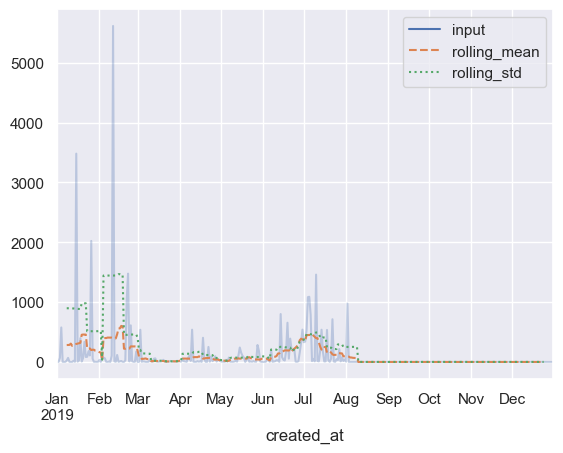

In [23]:
rolling = df_tweets_2019.loc[5820222].rolling(15, center=True)

data = pd.DataFrame({'input': df_tweets_2019.loc[5820222],
                     'rolling_mean': rolling.mean(),
                     'rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)
plt.show()

# Handle noise

In [24]:
def remove_noise(ts, w):
    return ((ts - ts.mean())/ts.std()).rolling(window=w, center=True, min_periods = 1).mean()

In [25]:
windows = np.array(range(1, 17)) # 1 to 16
windows_results = list()

for w in tqdm(windows):
    diff_sum = list()
    for userid in df_tweets_2019.index:
        user_ts = df_tweets_2019.loc[userid]
        #noise can be removed by using a moving average to smooth the time series
        user_ts_removed_noise = remove_noise(user_ts, w)
        diff_sum.append(np.abs(user_ts_removed_noise - user_ts))
    
    windows_results.append(np.average(diff_sum))

100%|██████████| 16/16 [02:11<00:00,  8.19s/it]


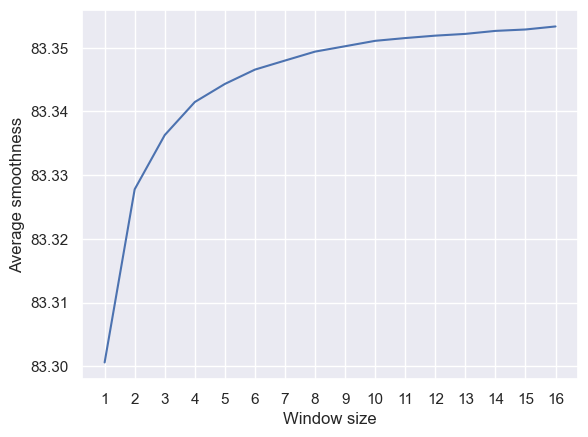

In [26]:
plt.plot(range(1, len(windows) + 1), windows_results)
plt.ylabel('Average smoothness')
plt.xlabel('Window size')
plt.xticks(range(1, len(windows) + 1))
plt.show()

In [27]:
best_window_size = 5
df_tweets_2019 = df_tweets_2019.apply(lambda ts: remove_noise(ts, best_window_size), axis=1)
df_tweets_2019

created_at,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,...,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
user_id,,,,,,,,,,,,,,,,,,,,,
7.226230e+05,-0.056145,-0.027350,-0.033081,-0.033062,-0.032885,-0.032633,-0.055660,-0.055680,-0.055674,-0.055832,...,-0.056205,-0.056205,-0.056205,-0.056205,-0.056205,-0.056205,-0.056205,-0.056205,-0.056205,-0.056205
7.557460e+05,-0.152135,-0.150899,-0.150157,-0.148431,-0.146948,-0.146948,-0.146948,-0.146531,-0.146774,-0.146531,...,-0.154606,-0.154606,-0.154606,-0.154606,-0.154606,-0.154606,-0.154606,-0.154606,-0.154606,-0.154606
8.069750e+05,-0.146489,-0.146489,-0.146489,-0.146489,-0.146489,-0.146489,-0.146489,-0.146489,-0.146489,-0.146489,...,-0.146489,-0.146489,-0.146489,-0.146489,-0.146489,-0.146489,-0.146489,-0.146489,-0.146489,-0.146489
8.872810e+05,1.075928,0.770732,0.587615,0.587615,0.587615,-0.144854,-0.144854,-0.144854,-0.144854,-0.144854,...,-0.144854,-0.144854,-0.144854,-0.144854,-0.144854,-0.144854,-0.144854,-0.144854,-0.144854,-0.144854
1.382561e+06,0.135724,0.076894,0.041403,0.046185,0.053362,-0.072413,-0.028990,-0.023979,-0.025134,-0.025454,...,-0.117607,-0.117607,-0.117607,-0.117607,-0.117607,-0.117607,-0.117607,-0.117607,-0.117607,-0.117607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.682782e+09,-0.090525,-0.090525,-0.090525,-0.090525,-0.090525,-0.090525,-0.090525,-0.090525,-0.090525,-0.090525,...,-0.090525,-0.090525,-0.090525,-0.090525,-0.090525,-0.090525,-0.090525,-0.090525,-0.090525,-0.090525
2.688868e+09,-0.090910,-0.090910,-0.090910,-0.090910,-0.090910,-0.090910,-0.090910,-0.090910,-0.090910,-0.090910,...,-0.090910,-0.090910,-0.090910,-0.090910,-0.090910,-0.090910,-0.090910,-0.090910,-0.090910,-0.090910
2.711227e+09,-0.105348,-0.105348,-0.105348,-0.105348,-0.105348,-0.105348,-0.105348,-0.105348,-0.105348,-0.105348,...,-0.105348,-0.105348,-0.105348,-0.105348,-0.105348,-0.105348,-0.105348,-0.105348,-0.105348,-0.105348


## Scaling

In [28]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

In [29]:
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)
df_tweets_2019_scaled = df_tweets_2019.copy()
for userid in df_tweets_2019_scaled.index:
    df_tweets_2019_scaled.loc[userid] = scaler.fit_transform(df_tweets_2019_scaled.loc[userid].values.reshape(1, -1)).flatten()

print("max: "+str(max(df_tweets_2019_scaled.iloc[0]))+"\tmin: "+str(min(df_tweets_2019_scaled.iloc[0])))

max: 8.48477438915494	min: -0.1266067345528756


In [30]:
df_tweets_2019_scaled

created_at,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,...,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
user_id,,,,,,,,,,,,,,,,,,,,,
7.226230e+05,-0.126471,-0.061626,-0.074532,-0.074490,-0.074091,-0.073523,-0.125379,-0.125424,-0.125411,-0.125767,...,-0.126607,-0.126607,-0.126607,-0.126607,-0.126607,-0.126607,-0.126607,-0.126607,-0.126607,-0.126607
7.557460e+05,-0.327108,-0.324451,-0.322857,-0.319145,-0.315957,-0.315957,-0.315957,-0.315059,-0.315581,-0.315059,...,-0.332422,-0.332422,-0.332422,-0.332422,-0.332422,-0.332422,-0.332422,-0.332422,-0.332422,-0.332422
8.069750e+05,-0.288175,-0.288175,-0.288175,-0.288175,-0.288175,-0.288175,-0.288175,-0.288175,-0.288175,-0.288175,...,-0.288175,-0.288175,-0.288175,-0.288175,-0.288175,-0.288175,-0.288175,-0.288175,-0.288175,-0.288175
8.872810e+05,2.037709,1.458707,1.111306,1.111306,1.111306,-0.278299,-0.278299,-0.278299,-0.278299,-0.278299,...,-0.278299,-0.278299,-0.278299,-0.278299,-0.278299,-0.278299,-0.278299,-0.278299,-0.278299,-0.278299
1.382561e+06,0.297249,0.168041,0.090091,0.100594,0.116357,-0.159885,-0.064515,-0.053510,-0.056045,-0.056749,...,-0.259147,-0.259147,-0.259147,-0.259147,-0.259147,-0.259147,-0.259147,-0.259147,-0.259147,-0.259147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.682782e+09,-0.130094,-0.130094,-0.130094,-0.130094,-0.130094,-0.130094,-0.130094,-0.130094,-0.130094,-0.130094,...,-0.130094,-0.130094,-0.130094,-0.130094,-0.130094,-0.130094,-0.130094,-0.130094,-0.130094,-0.130094
2.688868e+09,-0.130164,-0.130164,-0.130164,-0.130164,-0.130164,-0.130164,-0.130164,-0.130164,-0.130164,-0.130164,...,-0.130164,-0.130164,-0.130164,-0.130164,-0.130164,-0.130164,-0.130164,-0.130164,-0.130164,-0.130164
2.711227e+09,-0.192398,-0.192398,-0.192398,-0.192398,-0.192398,-0.192398,-0.192398,-0.192398,-0.192398,-0.192398,...,-0.192398,-0.192398,-0.192398,-0.192398,-0.192398,-0.192398,-0.192398,-0.192398,-0.192398,-0.192398


### Shape-based clustering (with euclidean distance)

In [31]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.generators import random_walks
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

def plot_indicators(sse_list, sil_list, sep_list):
    # SSE
    plt.plot(range(2, len(sse_list) + 2), sse_list)
    plt.ylabel('SSE')
    plt.xlabel('K')
    plt.xticks(range(2, len(sse_list) + 2))
    plt.savefig("../images/clustering/kmeans_sse.png")
    plt.show()

    # Silhouette
    plt.plot(range(2, len(sil_list) + 2), sil_list)
    plt.ylabel('Silouettes')
    plt.xlabel('K')
    plt.xticks(range(2, len(sil_list) + 2))
    plt.savefig("../images/clustering/kmeans_silouettes.png")
    plt.show()

    # Davies-Bouldin Score
    plt.plot(range(2, len(sep_list) + 2), sep_list)
    plt.ylabel('Separation')
    plt.xlabel('K')
    plt.xticks(range(2, len(sep_list) + 2))
    plt.savefig("../images/clustering/kmeans_separation.png")
    plt.show()

def k_means_timeseries(X, max_k, metric="euclidean", max_iter=100):
    sse_list = list()
    separations = list()
    silouettes = list()

    for k in tqdm(range(2, max_k + 1), total=max_k - 1, desc="Iterating over {0} possible K values".format(max_k)):
        kmeans = TimeSeriesKMeans(n_clusters=k, metric=metric, max_iter=max_iter, random_state=0)
        kmeans.fit(X)
        
        separations.append(davies_bouldin_score(X, kmeans.labels_))
        silouettes.append(silhouette_score(X, kmeans.labels_))
        sse = kmeans.inertia_
        sse_list.append(sse)

    return sse_list, silouettes, separations

def get_cluster_centers(kmeans, dates):
    df_centers = pd.DataFrame(index = dates)
    i = 1
    for center in kmeans.cluster_centers_:
        df_centers[i] = center
        i = i + 1
    return df_centers

def plot_cluster_centers(df_centr):
    for i in range(1, df_centr.shape[1]):
        sn.lineplot(df_centr[i], label='Cluster '+str(i))

In [32]:
sse_eucl, sil_eucl, davies_bouldin_eucl = k_means_timeseries(df_tweets_2019_scaled, 16, metric="euclidean", max_iter=10)

Iterating over 16 possible K values: 100%|██████████| 15/15 [01:51<00:00,  7.41s/it]


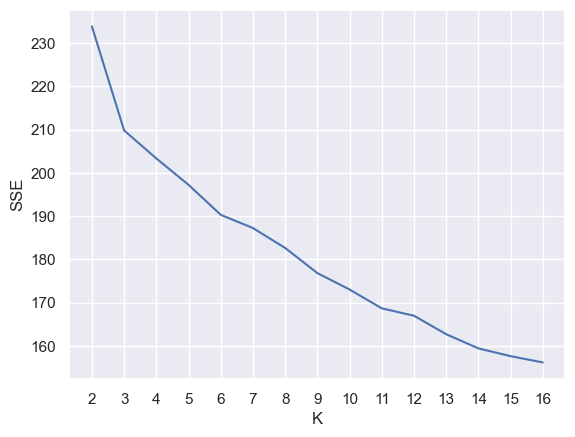

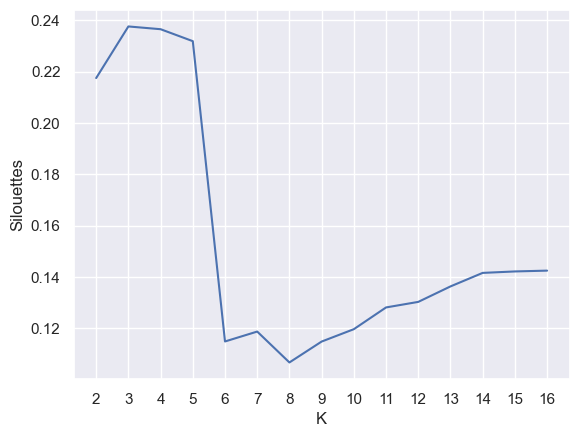

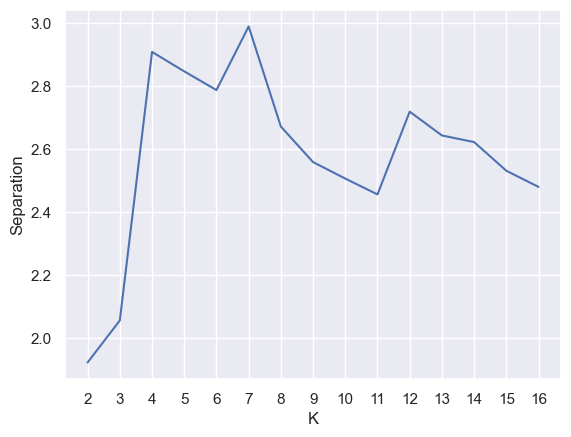

In [33]:
plot_indicators(sse_eucl, sil_eucl, davies_bouldin_eucl)

In [34]:
best_k = 5  # best k value
kmeans_eucl = TimeSeriesKMeans(n_clusters=best_k, metric="euclidean", max_iter=10, random_state=0)
kmeans_eucl.fit(df_tweets_2019_scaled)
print("SSE:", sse_eucl[best_k-2], " - SILHOUETTE:", sse_eucl[best_k-2])

SSE: 197.21299311616008  - SILHOUETTE: 197.21299311616008


In [35]:
df_centers_eucl = get_cluster_centers(kmeans_eucl, df_tweets_2019_scaled.columns)

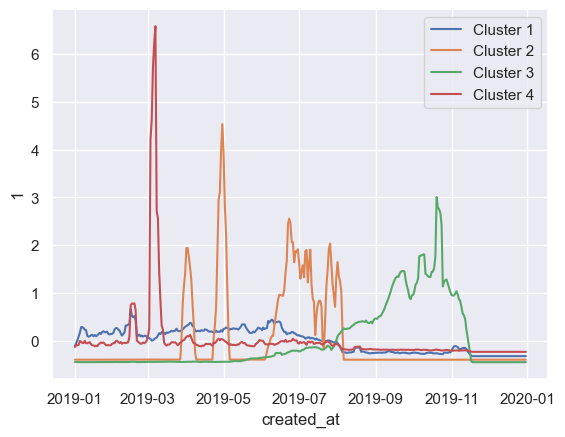

In [36]:
plot_cluster_centers(df_centers_eucl)

### Shape-based clustering (with dtw distance)

In [37]:
#kmeans_dtw = TimeSeriesKMeans(n_clusters=5, metric="DTW", max_iter=5, random_state=0, n_jobs=-1)
#kmeans_dtw.fit(df_tweets_2019_scaled.values)

In [38]:
#sse_dtw, sil_dtw, davies_bouldin_dtw = k_means_timeseries(df_tweets_2019_scaled, 16, metric="dtw", max_iter=5)

In [39]:
#plot_indicators(sse_dtw, sil_dtw, davies_bouldin_dtw)

In [40]:
"""best_k = 8  # best k value
kmeans_dtw = TimeSeriesKMeans(n_clusters=best_k, metric="dtw", max_iter=100, random_state=0)
kmeans_dtw.fit(df_tweets_2019_scaled)
print("SSE:", sse_dtw[best_k-2], " - SILHOUETTE:", sil_dtw[best_k-2])"""

'best_k = 8  # best k value\nkmeans_dtw = TimeSeriesKMeans(n_clusters=best_k, metric="dtw", max_iter=100, random_state=0)\nkmeans_dtw.fit(df_tweets_2019_scaled)\nprint("SSE:", sse_dtw[best_k-2], " - SILHOUETTE:", sil_dtw[best_k-2])'

### Feature-based clustering 

In [41]:
from sklearn.cluster import KMeans
import scipy.stats as stats

def calculate_features(values):
    features = {
        'avg': np.mean(values),
        'std': np.std(values),
        'var': np.var(values),
        'med': np.median(values),
        '10p': np.percentile(values, 10),
        '25p': np.percentile(values, 25),
        '50p': np.percentile(values, 50),
        '75p': np.percentile(values, 75),
        '90p': np.percentile(values, 90),
        'iqr': np.percentile(values, 75) - np.percentile(values, 25),
        'cov': 1.0 * np.mean(values) / np.std(values),
        'skw': stats.skew(values),
        'kur': stats.kurtosis(values)
    }

    return features

def k_means(X, max_k, max_iter=100):
    sse_list = list()
    separations = list()
    silouettes = list()

    for k in tqdm(range(2, max_k + 1), total=max_k - 1, desc="Iterating over {0} possible K values".format(max_k)):
        kmeans = KMeans(n_clusters=k, max_iter=max_iter, random_state=0)
        kmeans.fit(X)
        
        separations.append(davies_bouldin_score(X, kmeans.labels_))
        silouettes.append(silhouette_score(X, kmeans.labels_))
        sse = kmeans.inertia_
        sse_list.append(sse)
    
    return sse_list, silouettes, separations

In [42]:
features_array = [list(calculate_features(x).values())[:-2] for x in df_tweets_2019_scaled.values]
#F = [list(calculate_features(df_tweets_2019_scaled.loc[userid]).values())[:-2] for userid in df_tweets_2019_scaled.index]
np.shape(features_array)

(6787, 11)

In [43]:
sse_feat, sil_feat, davies_bouldin_feat = k_means(features_array, 16, max_iter=10)

Iterating over 16 possible K values: 100%|██████████| 15/15 [00:22<00:00,  1.48s/it]


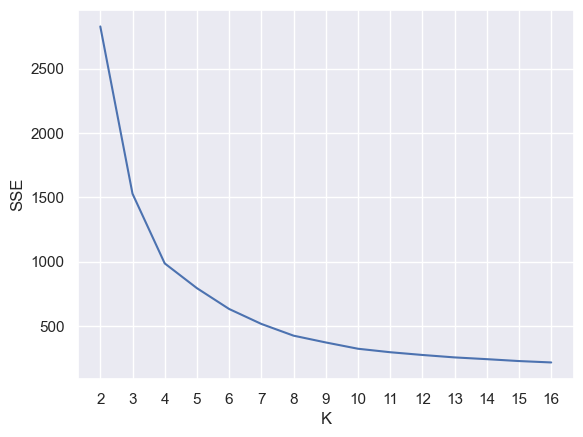

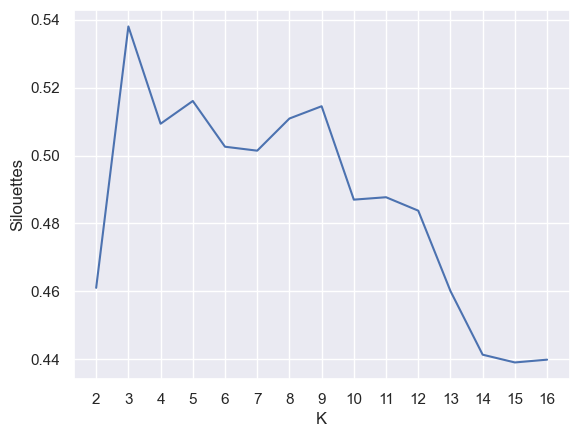

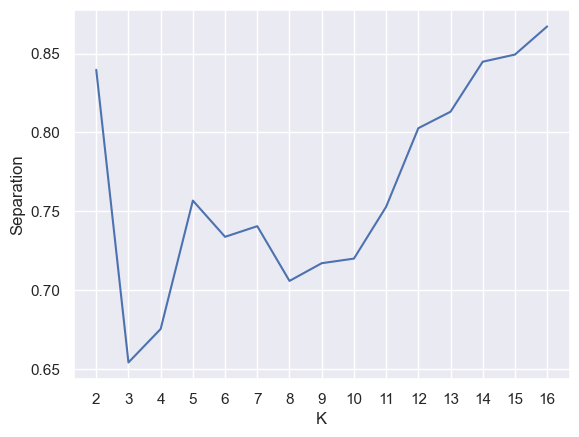

In [44]:
plot_indicators(sse_feat, sil_feat, davies_bouldin_feat)

In [45]:
best_k = 4  # best k value
kmeans_feat = KMeans(n_clusters=best_k, max_iter=10, random_state=0)
kmeans_feat.fit(features_array)
print("SSE:", sse_feat[best_k-2], " - SILHOUETTE:", sse_feat[best_k-2])

SSE: 985.8621230886848  - SILHOUETTE: 985.8621230886848


In [60]:
print("Clusters size:", np.unique(kmeans_feat.labels_, return_counts=True)[1])

Clusters size: [ 612 2089 2181 1905]


c:\Users\Domenico\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Domenico\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


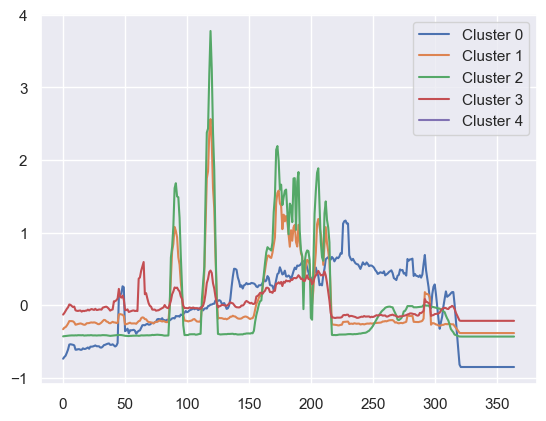

In [46]:
for i in range(5):
    sn.lineplot(np.mean(df_tweets_2019_scaled.values[np.where(kmeans_feat.labels_ == i)[0]], axis=0), label='Cluster '+str(i))
plt.show()

In [55]:
df_feat_mean = pd.DataFrame(index = df_tweets_2019_scaled.columns)
for i in range(best_k):
    df_feat_mean[i+1] = np.mean(df_tweets_2019_scaled.values[np.where(kmeans_feat.labels_ == i)[0]], axis=0)

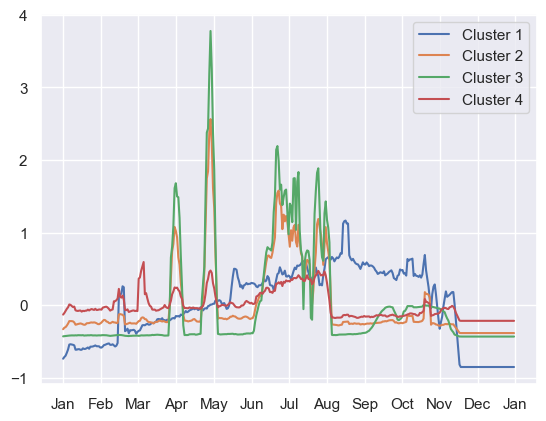

In [96]:
for i in df_feat_mean.columns:
    plt.plot(df_feat_mean[i].values, label='Cluster '+str(i))
plt.legend()
plt.xticks(np.linspace(0,365,13), months)
plt.show()

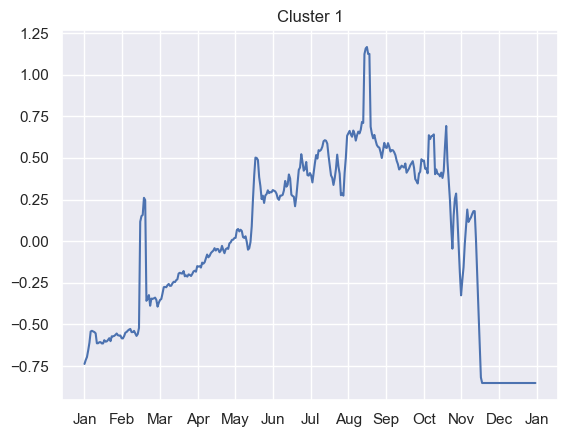

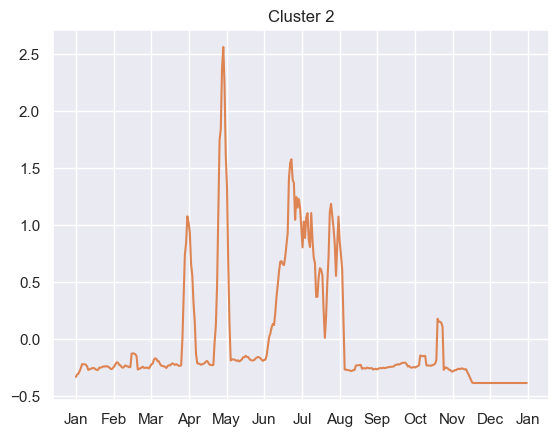

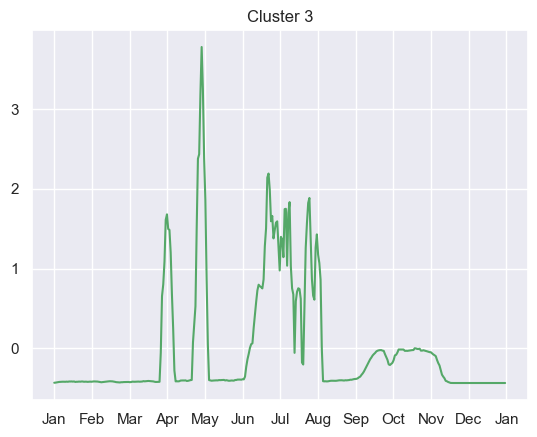

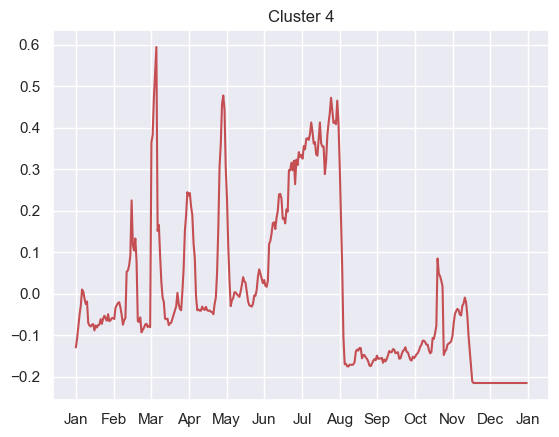

In [97]:
colors = sn.color_palette(n_colors=best_k)
for i in df_feat_mean.columns:
    plt.title('Cluster '+str(i))
    plt.plot(df_feat_mean[i].values, color=colors[i-1])
    plt.xticks(np.linspace(0,365,13), months)
    plt.show()